In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ford-car-price-prediction/ford.csv


**EDA**

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"/kaggle/input/ford-car-price-prediction/ford.csv")

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
df.shape

(17966, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [8]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

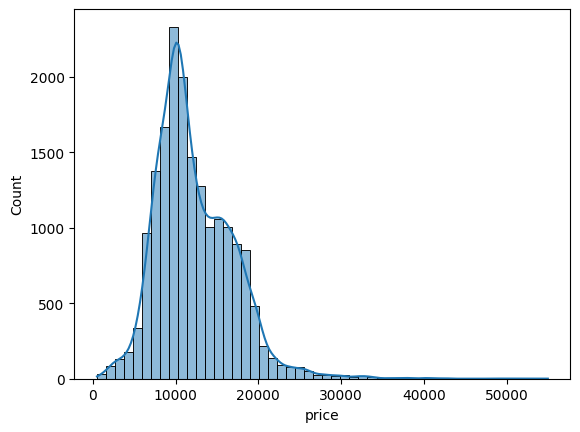

In [9]:
#EDA 

sns.histplot(df['price'],bins = 50,kde = True)

In [10]:
df.corr(numeric_only = True)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.636009,-0.707818,0.298506,-0.022967,-0.137311
price,0.636009,1.000000,-0.530659,0.406857,-0.346419,0.411178
mileage,-0.707818,-0.530659,1.000000,-0.260451,0.120075,0.215035
tax,0.298506,0.406857,-0.260451,1.000000,-0.502980,0.184363
mpg,-0.022967,-0.346419,0.120075,-0.502980,1.000000,-0.260521
engineSize,-0.137311,0.411178,0.215035,0.184363,-0.260521,1.000000


<Axes: >

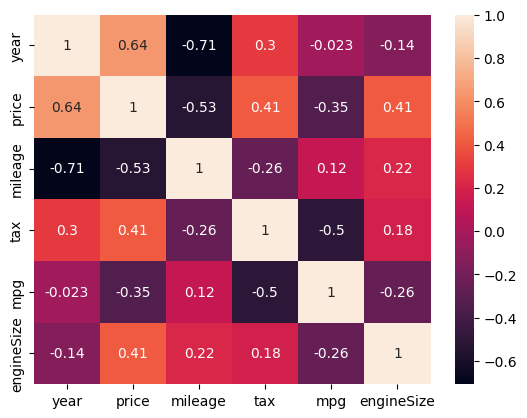

In [11]:
sns.heatmap(df.corr(numeric_only = True) ,annot = True)